In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from common_functions import *

def plot_forecast(test, forecast, date_col='ds', true_label='y', predicted_label='yhat'):
    plt.figure(figsize=(10,6))
    plt.plot(test[date_col], test[true_label], label='Actual')
    plt.plot(test[date_col], forecast[predicted_label], label='Predicted')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(true_label)
    plt.title('Actual vs Predicted ' + true_label)
    plt.show()


def train_prophet(train_data):
    model = Prophet()
    model.fit(train_data)
    return model

def forecast_prophet(model, test_data):
    forecast = model.predict(test_data)
    return forecast


def split_data(df, offset, train_size, test_size):
    """
    Split the data into train and test sets.

    Parameters:
    df (DataFrame): The input dataframe containing the time series data.
    offset (int): The number of days to offset the start of the train data from the beginning of the dataframe.
    train_size (int): The number of months to include in the train data.
    test_size (int): The number of days to include in the test data.

    Returns:
    train_data (DataFrame): The train data.
    test_data (DataFrame): The test data.
    start_date (Timestamp): The start date of the train data.
    slice_date (Timestamp): The end date of the train data.
    end_date (Timestamp): The end date of the test data.
    """
    train_data = df[(df.ds >= df.ds.min() + pd.DateOffset(days=offset)) & (df.ds <= df.ds.min() + pd.DateOffset(days=offset) + pd.DateOffset(months=train_size))]

    # If there is no number_of_test_values left in the df to the end, then train and test should be none
    if train_data.ds.max() + pd.DateOffset(days=test_size) > df.ds.max():
        return None, None, None, None, None
    
    test_data = df[(df.ds > train_data.ds.max()) & (df.ds <= train_data.ds.max() + pd.DateOffset(days=test_size))]

    start_date, slice_date, end_date = train_data.ds.min(), train_data.ds.max(), test_data.ds.max()

    return train_data, test_data, start_date, slice_date, end_date



Running experiment for dataset_aqi_hourly_filled_with_neighbors.csv with label AQI:



11:26:04 - cmdstanpy - INFO - Chain [1] start processing
11:26:05 - cmdstanpy - INFO - Chain [1] done processing


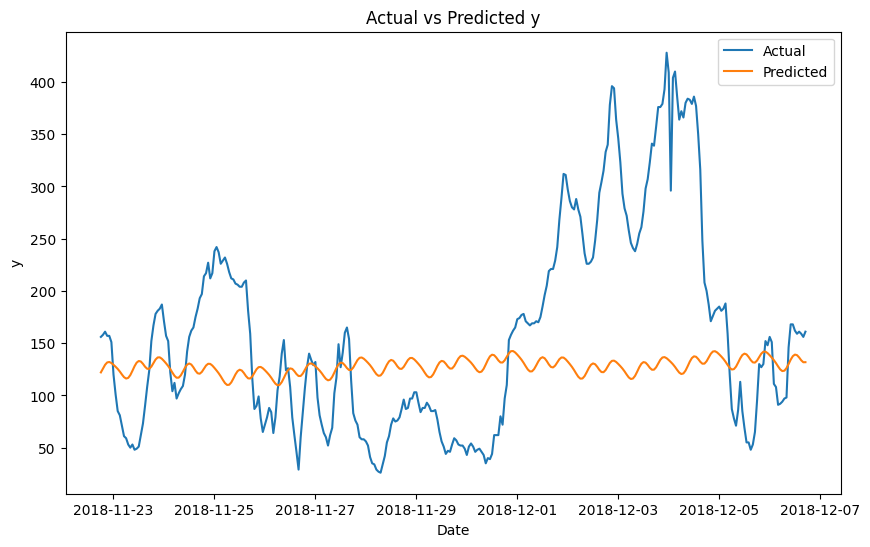

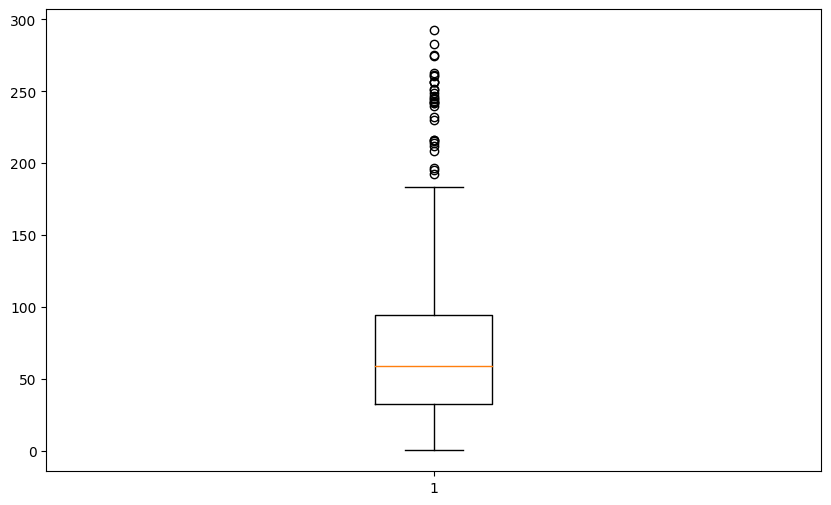

C:\Users\Vahidin\AppData\Local\Temp\ipykernel_11384\265844567.py:73: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  'DateTime of experiment': [pd.datetime.now()],
11:26:06 - cmdstanpy - INFO - Chain [1] start processing
11:26:07 - cmdstanpy - INFO - Chain [1] done processing


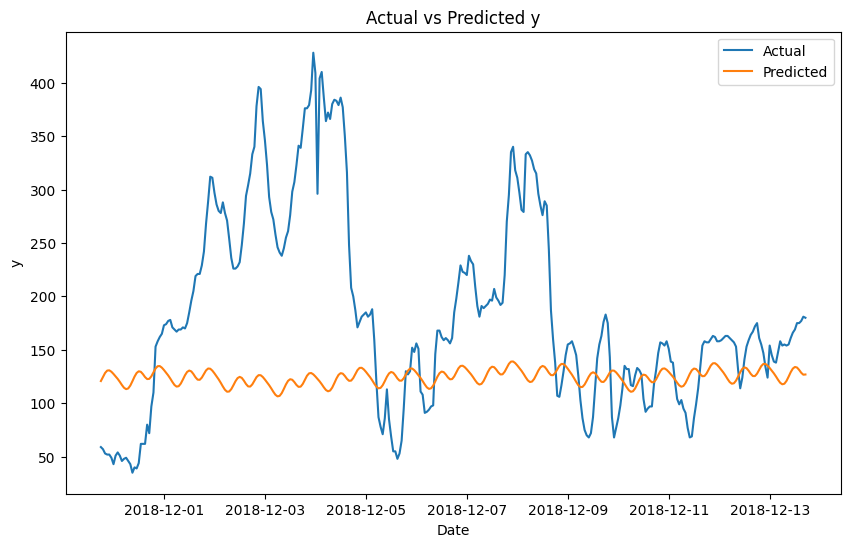

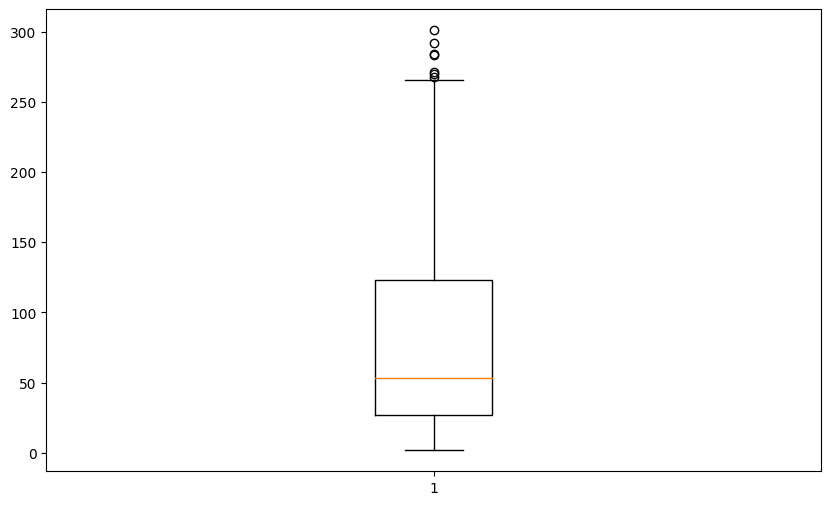

C:\Users\Vahidin\AppData\Local\Temp\ipykernel_11384\265844567.py:73: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  'DateTime of experiment': [pd.datetime.now()],
11:26:08 - cmdstanpy - INFO - Chain [1] start processing
11:26:09 - cmdstanpy - INFO - Chain [1] done processing


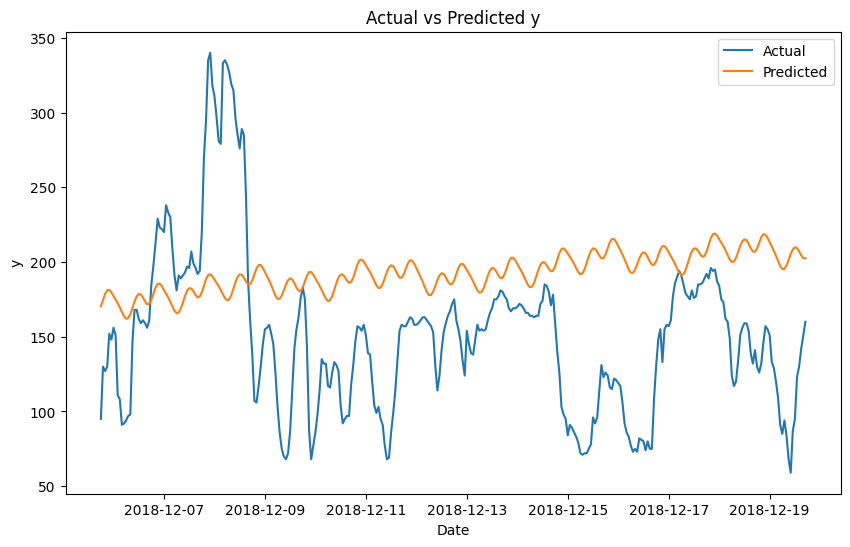

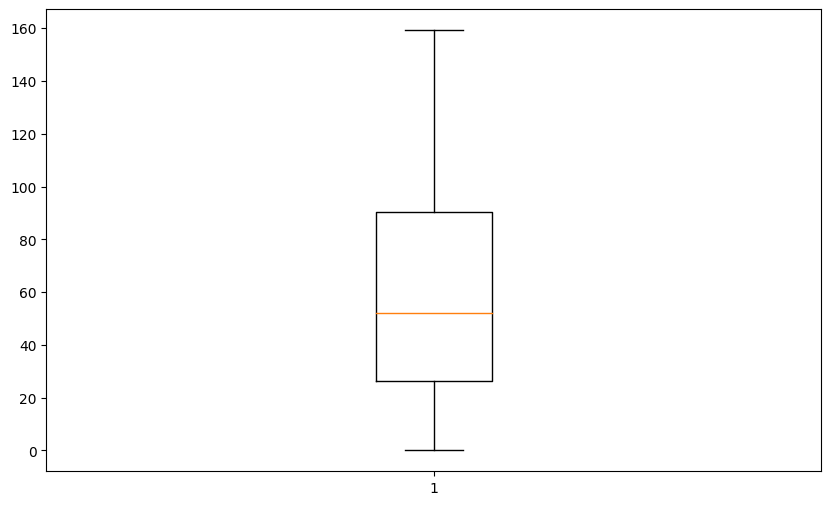

C:\Users\Vahidin\AppData\Local\Temp\ipykernel_11384\265844567.py:73: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  'DateTime of experiment': [pd.datetime.now()],
11:26:10 - cmdstanpy - INFO - Chain [1] start processing
11:26:11 - cmdstanpy - INFO - Chain [1] done processing


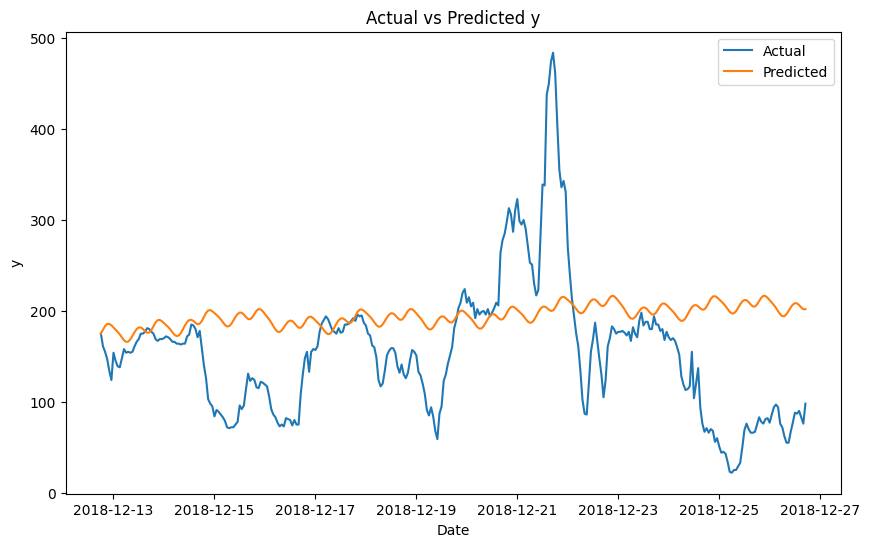

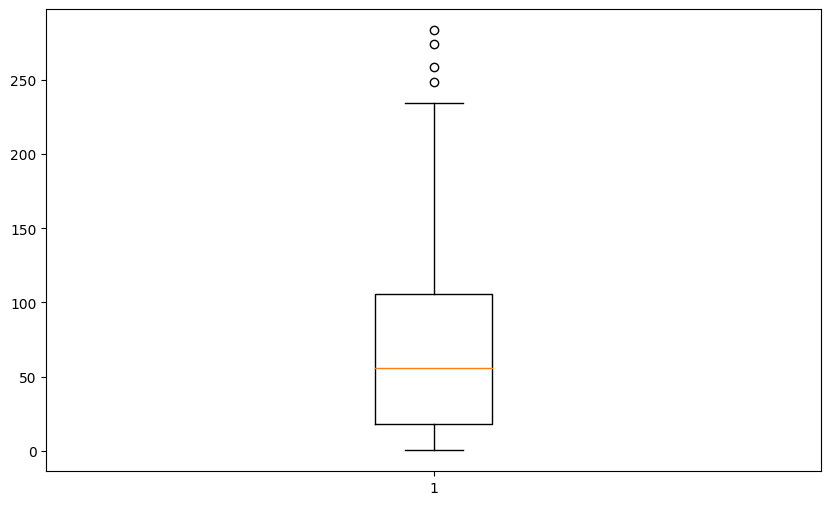

C:\Users\Vahidin\AppData\Local\Temp\ipykernel_11384\265844567.py:73: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  'DateTime of experiment': [pd.datetime.now()],


KeyboardInterrupt: 

In [13]:
# Write experiment data to file
dir_name = 'Results'
file_name = 'Prophet_experiment_results.csv'
file_path = os.path.join(dir_name, file_name)

# Create the directory if it doesn't exist
os.makedirs(dir_name, exist_ok=True)

# Experiment parameters
# train_size represents the number of months to be used for training (e.g. 4*12 is 4 years, 6 is 0.5 years)
# test_sizes represents the number of days to be used for testing (e.g. 4*7 is 4 weeks)
experiment_cases = [
    {'input_dir': "Dataset", 'filename': "dataset_aqi_daily.csv", 'label': "AQI", 'train_size': 4*12, 'test_sizes': [1, 1*7, 2*7, 4*7]}, 
    {'input_dir': "Dataset", 'filename': "dataset_aqi_hourly.csv", 'label': "AQI", 'train_size': 4*12, 'test_sizes': [1, 1*7, 2*7, 4*7]},
    {'input_dir': "Dataset", 'filename': "dataset_aqi_daily_filled_with_neighbors.csv", 'label': "AQI", 'train_size': 4*12, 'test_sizes': [1, 1*7, 2*7, 4*7]},
    {'input_dir': "Dataset", 'filename': "dataset_aqi_hourly_filled_with_neighbors.csv", 'label': "AQI", 'train_size': 4*12, 'test_sizes': [1, 1*7, 2*7, 4*7]},

    {'input_dir': "Dataset", 'filename': "dataset_aqi_daily.csv", 'label': "AQI", 'train_size': 1*12, 'test_sizes': [1, 1*7, 2*7, 4*7]}, 
    {'input_dir': "Dataset", 'filename': "dataset_aqi_hourly.csv", 'label': "AQI", 'train_size': 1*12, 'test_sizes': [1, 1*7, 2*7, 4*7]},
    {'input_dir': "Dataset", 'filename': "dataset_aqi_daily_filled_with_neighbors.csv", 'label': "AQI", 'train_size': 1*12, 'test_sizes': [1, 1*7, 2*7, 4*7]},
    {'input_dir': "Dataset", 'filename': "dataset_aqi_hourly_filled_with_neighbors.csv", 'label': "AQI", 'train_size': 1*12, 'test_sizes': [1, 1*7, 2*7, 4*7]},

    {'input_dir': "Dataset", 'filename': "dataset_aqi_daily.csv", 'label': "AQI", 'train_size': 0.5*12, 'test_sizes': [1, 1*7, 2*7, 4*7]}, 
    {'input_dir': "Dataset", 'filename': "dataset_aqi_hourly.csv", 'label': "AQI", 'train_size': 0.5*12, 'test_sizes': [1, 1*7, 2*7, 4*7]},
    {'input_dir': "Dataset", 'filename': "dataset_aqi_daily_filled_with_neighbors.csv", 'label': "AQI", 'train_size': 0.5*12, 'test_sizes': [1, 1*7, 2*7, 4*7]},
    {'input_dir': "Dataset", 'filename': "dataset_aqi_hourly_filled_with_neighbors.csv", 'label': "AQI", 'train_size': 0.5*12, 'test_sizes': [1, 1*7, 2*7, 4*7]}
]

for experiment_case in experiment_cases:
    input_dir = experiment_case['input_dir']
    filename = experiment_case['filename']
    label = experiment_case['label']
    train_size = experiment_case['train_size']
    test_sizes = experiment_case['test_sizes']
    offset = 0 # for first iteration

    # Load the CSV file
    df = pd.read_csv(os.path.join(input_dir,filename))
    df.DateTime = pd.to_datetime(df.DateTime)
    df.rename(columns={'DateTime': 'ds', label: 'y'}, inplace=True)


    print(f'\nRunning experiment for {filename} with label {label}:\n')
    for test_size in test_sizes:
        while True:
            train_data, test_data, start_date, slice_date, end_date = split_data(df, offset, train_size, test_size)

            if train_data is None or test_data is None:
                print(f'No more data for test size {test_size} days')
                break

            # plot_train_test_data(train_data, test_data, 'ds', 'y')

            offset += 7 # move train+test window forward by 7 days for next iteration

            model = train_prophet(train_data)
            forecast = forecast_prophet(model, test_data)

            mae = mean_absolute_error(test_data.y, forecast.yhat)
            rmse = np.sqrt(mean_squared_error(test_data.y, forecast.yhat))
            r2 = r2_score(test_data.y, forecast.yhat)
            smape = calculate_smape(test_data['y'].values, forecast['yhat'].values)

            plot_forecast(test_data, forecast)
            plot_boxplot(forecast['yhat'].values.reshape(-1,1), test_data['y'].values.reshape(-1,1))

            # model.plot_components(forecast)
            
            # Write results to file
            # Prepare data for CSV
            data = {
                'DateTime of experiment': [pd.datetime.now()],
                'Dataset used': [filename],
                'Label predicted': [label],
                'Training data from': [start_date],
                'Training data to': [slice_date],
                'Testing data from': [slice_date],
                'Testing data to': [end_date],
                'Test size': [len(test_data['y'])],
                'Test Predictions': [forecast['yhat'].to_list()],
                'Test Data': [test_data['y'].to_list()],
                'RMSE': [rmse],
                'MAE': [mae],
                'R2': [r2],
                'SMAPE': [smape]
            }

            # Convert to DataFrame
            df_results = pd.DataFrame(data)

            # Write DataFrame to CSV
            df_results.to_csv(file_path, mode='a', header=not os.path.exists(file_path), index=False)